In [1]:
# Import the libraries needed
import numpy as np
import pandas as pd
import random
import time
from IPython.display import display
import matplotlib.pyplot as plt

# Comparative Study of Dynamic Programming and Genetic Algorithms for the Solution of 0/1 Knapsack Problem

### Author Ivan Georgiev

## Abstract 

*The 0/1 Knapsack Problem, involves selecting a subset of items with given weights and values to maximize total value without exceeding a capacity limit. This project aims to compares two distinct approaches to solving this challange: Dynamic Programming (DP), which guarantees an optimal solution, and Genetic Algorithms (GA), a heuristic method inspired by natural evolution. By implementing both algorithms in Python, we evaluate their performance in terms of runtime and solution quality across varying problem sizes. Experiments reveal that DP excels in smaller instances with its precision, while GA offers scalability for larger instances at the cost of optimality. These findings highlight the trade-offs between exact and approximate methods, providing insights into their practical applicability in resource allocation and beyond.*

## Introduction 

The **0/1 Knapsack Problem** is a classic challenge in combinatorial optimization. Given $n$ items, each with a weight $w_i$ and value $v_i$, the goal is to select a subset of items that fits within a total weight capacity $W$ while maximizing total value. The “0/1” constraint means each item is either included or excluded and no partial selections is allowed. This problem has both theoretical significance and practical impact. Applications range from budget allocation under financial constraints to load planning in logistics and resource distribution in project management. Because of its wide-ranging relevance, efficient solution methods have been the subject of extensive research.
**Dynamic Programming (DP)** provides an exact solution, leveraging the problem’s optimal substructure to compute the best subset in $O(nW)$ time, where $𝑛$ is the number of items and $𝑊$ is the capacity. However, this pseudo-polynomial complexity can become impractical for large $n$ or $W$ and can lead to computational inefficiencies when the number of items or the knapsack capacity become too large.
In contrast, **Genetic Algorithms (GAs)**, inspired by natural evolution, offer a heuristic alternative. By evolving populations of solutions through selection, crossover, and mutation, GAs often deliver near-optimal results faster, though they do not guarantee optimality and may require careful tuning of parameters. 
*This project will compare the two algorithms for solving the 0/1 Knapsack Problem, analyzing their performance across different problem sizes. Specifically, we will focus on how th runtimes scale with problem size and how close the GA’s solution value is to the optimal solution found by DP.* By quantifying these trade-offs, we aim to get more details on the scenarios in which a fast, heuristic GA is preferable to the exact but more computationally intensive DP approach.

## Theoretical Background 
### 0/1 Knapsack Problem Definition 

Given $n$ items, where each item $i$ has a positive integer weight $w_i \in \mathbb{Z}$ and value $v_i \in \mathbb{Z}$, and a knapsack with capacity $W \in \mathbb{Z}$, the goal is to select a subset of items that maximizes total value, while keeping the total weight at or below $W$. Each item is either included or excluded (no fractional selections).

*Formally, define binary decision variables*: 
$$ x_i = \begin{cases} 1, & \text{if we include item }i,\\ 0, &&(\text{otherwise.}\end{cases} $$

The optimization problem is: 

\begin{align*}
\max\;           & \sum_{i=1}^n v_i\,x_i            && (\text{maximize total value})\\
\text{subject to}\; & \sum_{i=1}^n w_i\,x_i \le W    && (\text{capacity constraint})\\
                  & x_i \in \{0,1\}, \; i=1,\dots,n.
\end{align*}

The constraint $$\sum_{i=1}^{n} w_i x_i \leq W$$ ensures the total weight does not exceed the knapsack’s capacity, and the binary variables $x_i$ enforce the all-or-nothing selection rule.

Example: Consider 3 items with weights $w_1 = 2$, $w_2 = 3$, $w_3 = 4$, values $v_1 = 3$, $v_2 = 4$, $v_3 = 5$, and capacity $W = 5$. A valid solution is to select item 2 $( x_2 = 1 ), ( x_1 = x_3 = 0 )$, yielding total weight $ 3 \leq 5 $ and value $4$. Another solution, selecting items 1 and 2 $( x_1 = x_2 = 1 ), ( x_3 = 0 )$, gives weight $2 + 3 = 5 \leq 5$ and value $ 3 + 4 = 7 $. The optimal solution must maximize value while respecting the weight constraint.

This problem is NP-hard, with its decision version (“Does there exist a selection with total value at least ( V ) and total weight at most ( W )?”) being NP-complete. Exact solutions, such as those via Dynamic Programming, may require pseudo-polynomial time, while heuristic approaches, like Genetic Algorithms, offer faster but approximate solutions for large instances.

###  Dynamic Programming Algorithm Overview 

**Dynamic Programming (DP)** is a powerful algorithmic paradigm for solving complex problems by breaking them down into simpler, overlapping subproblems. It relies on two fundamental principles:
- Optimal Substructure: An optimal solution to the overall problem can be composed from optimal solutions to its subproblems.
- Overlapping Subproblems: The subproblems recur many times, so we can gain efficiency by solving each only once and storing (``memoizing'') its result.
DP can be implemented in two main ways:
- Top-down (memoization): Write a recursive formulation of the value/function, and cache each computed result to avoid redundant work.
- Bottom--up (tabulation): Identify an ordering of subproblems (e.g.\ by size or index) and fill in a table iteratively.
The term was used first  in the 1950's by Richard Bellman who formulated the Bellman Principle of Optimality and Bellman recurrence.  
#### Bellman’s Principle of Optimality
Bellman's Principle of Optimality states:
An optimal policy has the property that, whatever the initial state and decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision.
#### Bellman Recurrence
Let $V(x)$ denote the optimal value for state $x$. Suppose that from state $x$ you choose an action $u$ from the set of feasible actions $\mathcal{U}(x)$, which transitions you to state $ y \;=\; f(x,u) $ with immediate cost (or negative reward) $c\bigl(x,u,f(x,u)\bigr)$. 
Then the optimal value satisfies the recurrence
$$vV(x)
\;=\;
\min_{u \in \mathcal{U}(x)}
\Bigl\{\,
  c\bigl(x,u,f(x,u)\bigr)
  \;+\;
  V\bigl(f(x,u)\bigr)
\Bigr\}
$$
or, in a maximization setting,
$$ V(x) \;=\; \max_{u \in \mathcal{U}(x)} \Bigl\{r\bigl(x,u,f(x,u)\bigr) \;+\; V\bigl(f(x,u)\bigr) \Bigr\}. $$

#### Base Cases
To ground the recurrence, one must specify boundary conditions. For example, if $x^*$ is a terminal (or absorbing) state, one typically sets
$
  V(x^*) \;=\; 0
  \quad\text{(or some known terminal value).}
$

*#### Putting It All Together*
- Identify the state space $\mathcal{X}$ and action sets $\mathcal{U}(x)$ for each $x\in\mathcal{X}$.
- Derive the state transition function $y = f(x,u)$ and cost (or reward) function $c(x,u,y)$ (or $r(x,u,y)$).
- Write down the Bellman recurrence \eqref{eq:bellman}, choosing $\min$ for cost-minimization or $\max$ for reward-maximization.
- Specify base cases $V(x^*)$ for terminal states.
- Choose an implementation style:
  - Top–down: Recursively compute $V(x)$ and memoize.
  - Bottom–up: Order states, then iteratively fill a table for $V(x)$.*

The DP solution to 0/1 Knapsack Problem is typically implemented using a bottom-up approach. A 2D table, often denoted as $ dp $, of size `(n+1)x(W+1)` is constructed. $$DP[i][c]
= \max\bigl\{\text{total value using items }1,\dots,i\text{ with capacity }c\bigr\}
,\quad
0 \le i \le n,\;\;0 \le c \le W.$$

The rows of the table represent the number of items considered (from 0 to n), and the columns represent the knapsack capacity (from 0 to W). The table is filled iteratively, starting from the base cases where no items are considered ($dp[w] = 0 for all w$) or when the knapsack has zero capacity ($dp[i] = 0 for all i$). The values in the table are computed using the recurrence relation described bellow, progressing from smaller subproblems to the final solution, which is found at $dp[n][W]$.

Let $dp[i][w]$ represent the maximum value that can be obtained by considering items up to index $ i $ (from 0 to n-1) with a knapsack capacity of $ w $ (from 0 to W). The recurrence relation is defined as follows $1 \le i \le n$ and $0 \le w \le W$: 

- If we do not take item $i$, the value remains $ DP[i-1][w] $ (the optimum without this item).


- If we take item $i$ (of weight $w_i$ and value $v_i$), then we gain value $v_i$ plus whatever the best we can do with remaining capacity $w-w_i$ using previous items, which is $ DP [i-1][w-w-1]$ This is only feasible if $w_i \le w$.

So, we have the following two DP transitions:  

$$ DP[i][w] =
\begin{cases}
\max\bigl(DP[i-1][w],\,DP[i-1][w-w_i] + v_i\bigr), & w_i \le w,\\
DP[i-1][w], & w_i > w.
\end{cases} $$ 

Taking the better of these two choices yields the DP transition: 

$$ DP[i][w] = \max\bigl(DP[i-1][w],\,DP[i-1][w-w_i] + v_i\bigr)
\quad\text{if }w_i \le w. $$  

The base cases are $DP[0][w] = 0$ for all $w$ (with no items, value is 0) and $DP[i][0] = 0$ for all $i$ (with zero capacity, we can take nothing).

#### Reconstructing the Choosen Items
To find which items were taken:
- Compute the full 2D table $DP$.
- Initialize $i=n$, $c=W$, and an empty list chosen.
While $i>0$:

If $$DP[i][c]
= \max\bigl\{\text{total value using items }1,\dots,i\text{ with capacity }c\bigr\},
\quad
0 \le i \le n,\;0 \le c \le W.$$

 - append $i$ to `chosen`;
 - set c \;\leftarrow\; c - w_i.

- Else it was scipped
- Decrement $i$

#### Pseudo-Polynomial Nature
Because the time complexity is \(O(nW)\), which is polynomial in \(n\) and in the numeric value of \(W\) (rather than in the length of its binary encoding), the algorithm becomes infeasible when \(W\) is large. In such cases an approximation schemes (e.g., an FPTAS) or to alternative techniques should be used. 

###  Genetic Algorithm 
A **Genetic Algorithm (GA)** is a stochastic, population-based optimization method inspired by the nature. By using selection, croos-over and mutation, **GA** efficiantlly find near-optimal solutions for large or complex search spaces, when the exact methods are infeasible. 
A GA starts with a initializagtion of population of candidate solutions (individuals), each represented as a chromosome (e.g., a string of bits, numbers, or symbols). These solutions evolve over generations to optimize a fitness function $f(x)$ which quantifies how good a solution is. 
#### Key Steps and Workflow
1. Initialization - generate an initial population of $N$ candidate solutions, each encoded as a chromozome.
2. Evaluation - compute a fitness function $f(x)$ for a every individual according to a problem-specific criterion (higher is better)
3. Selection - choose parent individials probabilistically favoring higher fittnes, to form a mating pool. 
4. Crossover(recombination) - pair parents and exchange genetic materials to produce offspring wiht probability $p_c$. 
5. Mutation - introduce random perturbations to offspring genes with probality $p_m$, preserving diversity and avoiding local optima. 
6. Replacement - form a new generation by selecting among parents and offspring (e.g. full replacement, elitist retention). 
7. termination - repeat steps 2-6 until a stopping criterion is met (e.g. maximum generations, target fitness, or time budget).   
#### Population Initialization
  - A population of size $𝑁$ is initialized, where each individual $x_i$ $(i = 1,2,\dots,N)$ is a candidate solution.
  - Chromosomes are often encoded as:
   - Binary strings (e.g. $x_i = [0,1,1,0]$)
   - Real numbers (e.g. $x_i = [3.14, 2.71]$)
  - Initialization is typically random within a defined search space.
#### Fitness Function
- The fitness function $f(x_i)$ evaluates the quality of the individual $ x_i $.
- For maximization problems, higher $ f(x_i) $ indicates a better solution.
- For minimization problems, transform the objective, e.g., $f(x_i) = \frac{1}{1 + g(x_i)}$, where $ g(x_i) $ is the cost function.
- Example: If optimizing $g(x)=x^2$, the fitness might be $ f(x)\frac{1}{1+x^2}$.
#### Selection
- Selection chooses individuals to reproduce based on their fitness. Candidates are selected for reproduction based on their fitness, favoring those with higher fitness (the principle of "survival of the fittest").
- There are two common selection methods:
  - Fitness Proportionate Selection (Roulette Wheel):
     - Probability of selecting the individual $ x_i$
        $$ P(x_i) = \sum_{j=1}^N \frac {f(x_j)}{fx_i}$$ 
     - To spin the wheel a cumulative probability is used.
  - Tournament Selection - we use tournament selection, where a few random individuals compete and the one with the highest fitness wins the chance      to reproduce
    - Randomly pick $ k $ individuals and select the one with the highest fitness
    - Probability depends on fitness rankings
  - Rank-Based Selection
    - Assign selection probabilities based on fitness rank rather than row fitness values.
#### Crossover (Recombination) 
- Crossover combines the genetic materials of two parents to produce offspring. Also known as recombination, crossover takes two parent solutions   and combines them to produce one or two offspring. The idea is to mix genetic information from two good solutions, hoping to create an even better solution. Crossover is typically applied with a certain probability (crossover rate); if no crossover occurs, offspring are just copies of the parents.
- From two parents $ x_1 $ and $ x_2 $ crossover occurs with probability $ p_c $ (typically 0.6-0.9).
- Common crossover methods:
  - Single-Point Crossover -a random cut point is chosen in the chromosome string, and the prefix of Parent A is combined with the suffix of Parent B to form one child, while the complementary pieces form the second child
    - Choose a random point $ k $ in the chromosome (length $L$).
    - Swap genes after $k$:
      $$ x_1 = [a_1, a_2, \dots, a_k, a_{k+1}, \dots, a_L], \quad x_2 = [b_1, b_2, \dots, b_k, b_{k+1}, \dots, b_L $$
      $$ \text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
  - Uniform Crossover
    - For each gene swap parent genes with probability of 0.5
  - Arithmetic Crossover
    - Offspring are linear combinations 
     $$ \text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
#### Mutation
- Mutation introduces random changes to maintain diversity, applied with probability $P_m$ (typically 0.01-0.1). This introduces new genetic diversity into the population, which helps the algorithm avoid getting stuck in local optima.
- Common examples:
  - Bit-Flip Mutation (binary)
    - For each bit, flip (0 to 1, or 1 to 0) with probability $ p_m $.
  - Gaussian Mutation
     - Add random noise:
       $$ x_i' = x_i + \mathcal{N}(0, \sigma) $$ 
       where $ \mathcal{N}(0, \sigma) $ is a Gaussian distribution with a mean $ 0 $ and standard deviation $\sigma$.
   - Swap Mutation
      - Swap two randomly chosen positions    
#### Replacement Strategies
- The new population is formed by replacing some or all individuals.
- Common strategies:
  - Generational Replacement - replace entire generation with an offspring
  - Elitism - preserve the top $k$ individuals (e.g. best 1-5%) from one generation to the next to ensure the quality does not decrease.
  - Steady - State Replacement - replace only a few individuals per generation.<br>
#### Temination
Termination criteria are: 
 - Fixed number of generations
 - Fitness threshold reached
 - Convergence (e.g., no improvement over  generations)
 - Time or evaluation budget exhausted

#### Knapsack Algorithm
To solve the 0/1 Knapsack problem, GA is evolving a population of candidate solutions (chromosomes) over generations using different procersses- selection, crossover and mutations. Each chromosome representing a potential solution, is a binary vector of length $n$ where each bit represents whether the particular item is included (1) or not (0). A chromosome can be represented as a binary string of length $n$: $ x = (x_1, x_2, \dots, x_n)$, where $ x_i = 0$ or 1.The initialization could be bias toward feasibility by rejecting any chromosome whose total weight > W, or by repeatedly flipping 1 → 0 at random until weight ≤ W. A fitness function is define to evaluate the quality of each candidate solution. The fitness of a chromosome measures how good the solution is. For the knapsack problem, a natural fitness is the total value of selected items. For a chromosome $x$: 
$$ W_x = \sum_{i=1}^n w_i x_i\qquad V_x = \sum_{i=1}^n v_i x_i $$
$$\mathrm{Fitness}(x) =
\begin{cases}
V_x,                                    & W_x \le W,\\
V_x - k\,\bigl(W_x - W\bigr),           & W_x > W.
\end{cases}$$

When $ W_x > W$ a candidate violates the weight constraint and is infeasible. To handle this, we use the so-called penalty approach, in which a penalty is assigned to reduce the fitness, where $k$ is a positive constant. 
$$\mathrm{Fitness}(x) = V_x - k(W_x - W\bigr) $$
Choosing $k$ is crucial:
- if $k$ is too small, infeasible individuals may dominate the population.
- if $k$ is too large, borderline solutions with high value but slight overweight may be unfairly rejected.
Alternatively, one can set the fitness of any infeasible solution to zero (or another very low value). This harsher approach forces the entire population to remain within the weight limit.

Once an initial population of $P$ random chromosomes (binary strings) has been generated, the GA proceeds through repeated cycles of selection, crossover, mutation, and replacement. Over successive generations, the population “evolves” toward better solutions—the average fitness rises, and the best individual converges toward the optimum. Termination can be based on a fixed number of generations or when improvements stagnate. Because GAs are inherently stochastic, different runs can yield different outcomes, and there is no guarantee of finding the absolute optimum. Nevertheless, for large or complex instances, where exact methods like **DP** become impractical **GAs** often deliver high-quality, near-optimal solutions in a fraction of the time.

###  Previous Work Preview 
Over the last decade, numerous studies have compared GAs against DP on knapsack benchmarks, evaluating trade - offs in runtime, solution quality, and scalability. The comparative analysis confirms a consistent pattern: dynamic programming vs. genetic algorithms for 0/1 knapsack is a trade-off between optimality and efficiency. GAs have proven to be powerful heuristics that scale to hard instances and produce near-optimal solutions fast, while DP remains an invaluable exact solver for smaller instances or verification. The choice between them depends on problem size, time/resources available, and how critical finding the absolute optimum is. 
#### Runtime Performance 
One fundamental difference between DP and GAs is their computational complexity. A typical DP for 0/1 knapsack runs in pseudo-polynomial time O(n·W) (where n is number of items and W the capacity).In the worst case (when W is large relative to item weights), this can be exponential in the input size. By contrast, a GA does not enumerate all weight states; its runtime is roughly O(n · G) (linear in problem size per generation G). If the population size and generations are bounded, GAs often run in near-linear time overal. Exact DP algorithms tend to slow down substantially as problem size increases, whereas GAs scale more gracefully. Notably, for small problem sizes or moderate capacities, DP can run acceptably fast, sometimes finishing in seconds or minute. In contrast, GAs (and other meta-heuristics) have been able to tackle much larger instances within reasonable time. In summary, GAs generally offer dramatically lower runtime for large-scale knapsack problems, whereas DP guarantees optimality at the cost of higher computation time.
#### Solution Accuracy
The trade-off for GAs’ speed is that they provide approximate solutions. Dynamic programming is an exact method, always yielding the global optimal knapsack value.By contrast, a GA is a stochastic heuristic; it does not guarantee the optimal solution. The quality of GA solutions depends on factors like population diversity, number of generations, and genetic operators. In practice, however, well-tuned GAs often achieve near-optimal results for knapsack instances. Many comparative studies measure how close a GA’s best solution is to the optimal (obtained via DP or other exact methods). Over the past decade, results consistently show GAs can reach 90–100% of the optimal value on average, especially with sufficient iteration. For example, Shaheen & Sleit found that while greedy heuristics and GAs both sometimes fall short of the true optimum, the GA’s “local optimal result is better” than a greedy algorithm’s in most case. In several cas studies, the GA even found the exact optimal solution, matching the DP result.This aligns with other reports that genetic algorithms can produce high-quality solutions for knapsack; for instance, a GA can often find 99%+ of the optimal value given enough generations.
In summary, DP guarantees 100% optimal knapsack value, while GAs usually achieve near-optimal values (e.g. 95–100% of optimum) with far less computation. The last decade of experiments confirms that a properly configured GA can yield solutions of impressive quality for 0/1 knapsack, although small deviations from the optimal value can occur if the GA converges prematurely or has insufficient diversity.

Numerous academic studies have been conducted to compare heuristic approaches, such as Genetic Algorithms, with exact methods, like Dynamic Programming, for solving NP-hard problems, with a particular focus on the 0/1 Knapsack Problem. These comparisons aim to understand the strengths and weaknesses of each approach under different problem conditions. Findings from these studies generally indicate that DP is more efficient for small to medium-sized instances, especially when an optimal solution is required. For example, research suggests that DP excels when the number of items and the knapsack capacity are within manageable limits, providing a guaranteed optimal solution. However, these studies also point out that DP's runtime tends to grow polynomially with the number of items but can increase more significantly with the capacity, potentially becoming impractical for very large capacities. Conversely, previous work has shown that GA can be more effective for larger instances of the 0/1 Knapsack Problem, often delivering near-optimal solutions in significantly shorter time compared to DP. Studies indicate that while GA might not always find the absolute best solution, its ability to explore a large solution space efficiently allows it to quickly converge to a high-quality solution, especially when the problem size makes DP computationally expensive. Some research suggests that GA's runtime is less sensitive to the knapsack capacity and more influenced by the number of items and the number of generations it runs. Furthermore, the literature also includes explorations of hybrid approaches that combine DP and GA to leverage the advantages of both methodologies. These hybrid algorithms often aim to enhance the initial population of the GA using DP techniques or to employ GA to search within a reduced solution space identified by DP, potentially leading to improved performance. Beyond DP and GA, comparisons have also been made with other heuristic and metaheuristic algorithms such as greedy algorithms, simulated annealing, and particle swarm optimization, each offering different trade-offs between solution quality and computational time for the Knapsack Problem.

In other words the existing body of research strongly supports our initial hypothesis. The consistent findings across various studies provide a solid foundation for our experimental design and analysis proposed. The recurring theme in the literature highlights the expected strengths of DP for smaller problem instances  as well as the potential of GA to provide efficient, high-quality solutions for larger instances where DP becomes less practical due to its computational demands. 

## Experiment Set Up and Methodology
### 3.1. Instance Generation
To conduct a thorough comparison, we will generate a diverse set of 0/1 Knapsack problem instances. These instances will vary in size and complexity by systematically adjusting key parameters.The primary parameters to be varied are:
- Number of Items (n): The experiments will focus at the begging on smaller values for the number of items - 10, 25, and 50. These sizes represent instances where the DP algorithm is expected to perform well.The number of items will then be gradually increased to moderate and larger sizes (e.g., 100, 200, 300, 400 and 500). Our goal is to observe how the performance of both algorithms changes and to see the problem size at which GA may become more advantageous in terms of efficiency.
- Knapsack Capacity (W): The knapsack capacity will be generated as a fraction of the total weight of all available items. For example the capacity will be set to 50% of the sum of the weights to ensure that the instances are sufficiently challenging, requiring a meaningful selection of items rather than simply including everything. Also, to independently assess the impact of capacity scaling, experiments with fixed capacity values across different numbers of items might be conducted.
- Item Weights and Values: The weights and values of the individual items will be generated using random integers within a specified range. For instance, weights and values could be randomly chosen from a uniform distribution between 1 and 100. The specific range and distribution used will be clearly documented. To provide a more comprehensive analysis, consideration will be given to exploring different distributions, such as those where item weights and values might be correlated.
### 3.2. Performance Metrics
The performance of the DP and GA algorithms will be quantitatively compared using the following metrics:
- Run Time: The execution time of each algorithm for each generated problem instance will be measured using Python's time module or the more precise timeit module.The runtime will be recorded in milliseconds to allow for accurate comparisons, especially for smaller instances where the execution times might be very short.
- Solution Quality: For the smaller to moderate sized problem instances, where the DP algorithm is expected to compute the optimal solution within a reasonable timeframe, the total value obtained by the GA will be compared against this optimal value.
- *Performance Ratio: To quantify the difference between the GA's solution and the optimal DP solution, the relative error will be calculated using the formula*: $$ \textRelative Error = |(Optimal Value - GA Value) /Optimal Value|\text $$.This error will be expressed as a percentage to provide an easily interpretable measure of the deviation from the optimal solution.*
### 3.3. Parameter Tuning for GA
Tuning the hyperparameters of the Genetic Algorithm is crucial for achieving optimal performance in terms of both runtime and the quality of the solutions it produces. The key parameters that will be tuned are:
- Population Size: This refers to the number of candidate solutions maintained in each generation of the GA. Different population sizes (e.g., 50, 100, 200) will be tested to observe their effect on the exploration of the solution space and the speed at which the algorithm converges
- Mutation Rate: The mutation rate determines the probability that a bit in a chromosome will be flipped during the mutation operation. A range of mutation rates (e.g., 0.01, 0.05, 0.1) will be experimented with to find a balance between exploration (high mutation rate) and exploitation (low mutation rate).
- Number of Generations: This parameter specifies the total number of iterations the GA will run. Different numbers of generations (e.g., 100, 500, 1000) will be tested to assess their impact on the final solution quality and the overall runtime of the algorithm.
The parameter tuning process will involve running the GA with various combinations of these parameter values on a subset of the generated problem instances. The performance of each combination will be evaluated based on the defined metrics (runtime and solution quality). *The GA will be run for a fixed number of generations or until a convergence criterion is met, such as the best fitness in the population not improving significantly for a specified number of consecutive generations.*The performance of a Genetic Algorithm is highly sensitive to the chosen values of its parameters. Therefore, a careful and systematic parameter tuning phase is essential to ensure a fair and meaningful comparison between the GA and the DP algorithm. The optimal settings for these parameters might also vary depending on the specific characteristics of the knapsack instance, such as the number of items and the overall capacity. The relative error metric provides a crucial means to quantify the trade-off between the guaranteed optimality of DP and the potentially suboptimal solutions offered by GA.1 By calculating the relative error, a clear understanding can be gained regarding how closely the approximate solutions found by the GA approach the exact optimal solutions determined by DP for smaller problem instances.

## Python Implementation
In this section, we provide Python implementations for solving the 0-1 Knapsack Problem using dynamic programming and a genetic algorithm. 
### Dynamic Programming Implementation (2D Table)
We will implement the DP solution using a 2D table `dp` of shape `(n+1)x(capacity+1)`. `dp[n][w]` will hold the maximum value achiavable, where $n$ is the number of items and $w$ is the capacity. The algorithm fills in the 2D table iteratively and the end we get the maximum values achivable in $O(nW)$ time. 
We iterate $i$ from 1 to $n$ (considering items one by one), and for each item we loop $w$ from 0 to capacity. If the current item can fit in the capacity $w$, we decide to either include it or not, taking the better value. Otherwise, we skip it. In the end, `dp[n][capacity]` contains the optimal value for $n$ items and capacity $w$ (the bottom‐right cell of that table is the max value). 
To recover the items which were choosen, we initiate an array of length $n$ to all False. Iterate $i$ from $n$ down to 1 and compare `dp[i][w]`versus `dp[i-1][w]`. If they differ, it means the `i-th` item was taken in the optimal solution and we mark `selected[i-1]=True`. By the end whem we reach $n = 1$, `selected` will hold the exact items which were included in the knapsack. 
This implementation uses a 2D list for clarity. In practice, we can optimize space by using a 1D array, but the complexity remains $O(nW)$.

In [8]:
def solve_knapsack_dp(weights, values, capacity):
    n = len(weights)
    dp = np.zeros((n + 1, capacity+1), dtype=int)
    for i in range(1, n + 1):
        w_i, v_i = weights[i - 1], values[i - 1]
        for w in range(capacity + 1):
            if w_i <= w:
                dp[i, w] = max(v_i + dp[i-1, w-w_i], dp[i-1, w])
            else:
                dp[i, w] = dp[i-1, w] 

    selected = np.zeros(n, dtype=bool)
    w = capacity
    for i in range(n, 0, -1):
        if dp[i, w] != dp[i - 1, w]:
            selected[i - 1] = True
            w -= weights[i - 1]
    return dp[n, capacity], selected

In [9]:
weights = [2, 3, 4]
values = [5, 7, 8]
capacity = 6
max_value = solve_knapsack_dp(weights, values, capacity)
print(f"For weigths = {weights}, values ={values}, capacity = {capacity} , max_value ={max_value}")

For weigths = [2, 3, 4], values =[5, 7, 8], capacity = 6 , max_value =(13, array([ True, False,  True]))


## Genetic Algorithm Implementation
We solve the 0/1 knapsack problem by evolving a population of binary vectors of length $n$, where each bit indicates whether the corresponding item is included. The GA algorithm starts with the following default parameters: 
`population_size = 100  
num_generations = 200  
mutation_rate = 0.01  
tournament_size = 3  
elitism = True`
The GA algorithm fitness function is the total value of the chosen items if their total weight does not exceed the capacity; otherwise we assign fitness 0 to enforce feasibility. We generate an initial population of `population_size` individuals by sampling each bit uniformly at random from {0, 1}.
- Selection (Tournament). To choose parents, we perform tournaments of size `tournament_size`, randomly pick that many individuals and select the one with highest fitness. This strikes a balance between selective pressure and genetic diversity.
- Crossover. We apply single-point crossover: choose a random cut-point in `[1, n–1]`, and swap the tails of two parents to produce two offspring. This recombines useful building blocks.
- Mutation. Each bit of an offspring is flipped with probability `mutation_rate`. Mutation injects new genetic material and helps avoid local optima.
- Elitism. If `elitism=True`, the best individual from the current generation is copied unchanged into the next generation, ensuring solution quality never degrades.
In the main loop we repeat `num_generations` and evaluate the fitness of all individuals, record the best individual so far and build a new population by either copy the elite or fill the rest by selecting parents, applying crossover, then mutation. At the we truncate the population to `population_size`.
The algoritm returns the best value and its corresponding binary vector.

In [11]:
def solve_knapsack_ga(weights, values, capacity, population_size=100, num_generations=200,
                      mutation_rate=0.01, tournament_size=3, elitism=True):
   
    n = len(weights)
    def fitness(ind):
        total_w = int((weights * ind).sum())
        return int((values * ind).sum()) if total_w <= capacity else 0
    
    def create():
        return np.random.randint(0, 2, size=n)
    
    def tour(pop, fits):
        competitors = random.sample(range(len(pop)), tournament_size)
        return pop[max(competitors, key=lambda i:fits[i])].copy()
    
    def crossover(p1, p2):
        pt = random.randint(1, n-1)
        return np.concatenate([p1[:pt], p2[pt:]]), np.concatenate([p2[:pt], p1[pt:]])
    
    def mutate(ind):
        for i in range(n):
            if random.random() < mutation_rate:
                ind[i] ^= 1
        return ind

    pop = [create() for _ in range(population_size)]
    best_val, best_ind = 0, pop[0].copy()
    for _ in range(num_generations):
        fits = [fitness(ind) for ind in pop]
        idx = int(np.argmax(fits))
        if fits[idx] > best_val:
            best_val, best_ind = fits[idx], pop[idx].copy()
        new_pop = []
        if elitism:
            new_pop.append(best_ind.copy())
        while len(new_pop) < population_size:
            p1, p2 = tour(pop, fits), tour(pop, fits)
            c1, c2 = crossover(p1, p2)
            new_pop.extend([mutate(c1), mutate(c2)])
        pop = new_pop[:population_size]
    return best_val, best_ind

## Running the Experiments
To compare the performance of DP and GA, we define and run two solvers for the 0/1 knapsack problem:
- a exact solver based on dynamic programming `run_dp`;
- a heuristic solver based on a genetic algorithm `run_ga`.

At the begging we define an instance generator `generate_knapsack_instance`, which for a given number of items $n$, draws random weights and values, then sets capacity to a fraction (the “capacity factor”) of the total weight. This gives us controlled, repeatable test problems where we can dial both size and tightness.<br>
We wrap each solver in a timing harness: `run_dp(weights, values, capacity)`, which calls the exact Dynamic Programming solver and returns the optimal value, item selection, and the time taken and `run_ga(weights, values, capacity, params)`, calls the Genetic Algorithm solver with parameters (population size, generations, mutation rate, tournament size, elitism) and returns the best value found, item selection, and the time taken
We benchmark the two solvers on randomly generated instances of increasing size.
### Benchmark #1: Varying Number of Items
**Function:** `benchmark_with_quality(ns, trials=5)`

Run both the exact Dynamic Programming (DP) solver and the Genetic Algorithm (GA) solver on knapsack instances of increasing size, then compare speed and solution quality.
#### Procedure
1. **Input**
   - A list of item counts:  
     `ns = [10, 20, 50, 100, …]`
   - Number of trials per \(n\): `trials` (default 5)
2. **For each** \(n \in ns\):
   1. **Repeat** `trials` times:
      - **Generate** a random knapsack instance with \(n\) items.
      - **Solve** with DP:
        - Record `(dp_value, dp_time)`.
      - **Solve** with GA:
        - Record `(ga_value, ga_time)`.
   2. **Aggregate** across trials:
      - \(\displaystyle\overline{dp\_time}, \ \overline{ga\_time}\)
      - \(\displaystyle\overline{dp\_value}, \ \overline{ga\_value}\)
      - **Quality ratio:**  
        \[
          \text{quality\_ratio}
          = \frac{\overline{ga\_value}}{\overline{dp\_value}}
        \]
   3. **Append** one row to `df_quality` with columns:
      ```
      n | avg_dp_time | avg_ga_time | avg_dp_value | avg_ga_value | quality_ratio 
       ```
We use the first benchmark to answer some key questions about our two solvers—exact DP vs. heuristic GA—in a systematic, data-driven way
- Measure and compare performance
Runtime scaling: DP has time (and memory) roughly proportional to $n\times C$, which can blow up quickly as you add items or increase capacity. The GA’s cost grows more gently (driven by population size × generations × $n$). By timing both across a range of $n$, you see exactly where DP becomes impractical and where GA stays feasible.
- Evaluate solution quality
DP always finds the true optimal value; the GA is approximate. The benchmark computes a quality ratio = (mean GA value)/(mean DP value) to quantify how close the GA gets, on average, to the optimum. If that ratio stays above, say, 0.95, you know you’re trading only a few percent of optimality for large speed gains.
- Understand variability & robustness
Because both the instances and the GA itself have random components, we repeat each experiment several times (here, 5 trials) and average. That smooths out “lucky” or “unlucky” runs and gives you confidence in the typical behavior of each solver.
- Guide algorithm selection & parameter tuning
With concrete curves of time vs. $n and quality vs. $n in hand, you can choose the right tool for your problem size. If you need provable optima for small $n$, DP is fine; if you need “good‐enough” solutions quickly at large $n$, the GA wins. You can also tweak GA parameters (population, generations, mutation rate) and re-benchmark to see how they affect speed vs. quality.
- Ensure reproducibility
By codifying instance generation, solver runs, and metrics gathering in one function, you—or anyone else on your team—can rerun the exact same experiment later (e.g. after algorithmic improvements or on different hardware) and directly compare results.

## Benchmark #2: Varying Size & Capacity Tightness  
**Function:** `benchmark_varying_capacity(ns, capacity_factors, trials=5)`

Extend Benchmark #1 by not only varying the number of items \(n\), but also the knapsack tightness (capacity factor). This “tall” benchmark lets you slice results by either dimension.
#### Procedure
1. **Inputs**  
   - Item counts:  
     `ns = [10, 20, 50, 100, …]`  
   - Capacity factors:  
     `capacity_factors = [0.25, 0.50, 0.75, …]`  
   - Trials per combination:  
     `trials` (default 5)
2. **For each** \((n, cf)\) in the Cartesian product of `ns × capacity_factors`:
   1. **Repeat** `trials` times:
      - **Generate** a random knapsack instance with:
        - \(n\) items  
        - Capacity \(C = cf \times \sum(\text{all item weights})\)
      - **Solve** with DP:
        - Record `(dp_value, dp_time)`
      - **Solve** with GA:
        - Record `(ga_value, ga_time)`
   2. **Aggregate** across trials:
      - \(\overline{dp\_time}, \ \overline{ga\_time}\)
      - \(\overline{dp\_value}, \ \overline{ga\_value}\)
      - **Quality ratio:**  
        \[
          \frac{\overline{ga\_value}}{\overline{dp\_value}}
        \]
   3. **Append** one row to `df_cap` with columns:
      ```
      n | capacity_factor | avg_dp_time | avg_ga_time | avg_dp_value | avg_ga_value | quality_ratio
      
The second benchmark `benchmark_varying_capacity` is crucial because it adds a whole new dimension to our comparison, beyond just “number of items.” 
- Knapsack “tightness” dramatically affects DP cost
DP’s running time and memory footprint scale with $n×C$. When the capacity $C$ is small (tight knapsack), DP is extremely fast; when $C$ grows large (loose knapsack), DP can grind to a halt. By sweeping across different capacity factors (e.g. 20%, 40%, 60%, 80% of total weight), we can see exactly how sensitive DP is to this parameter.
GA runtimes are capacity‐independent. The genetic algorithm’s cost depends on population size, number of generations, and $n$ — not on $C$. If we only vary $n$, we won’t observe this fact. The second benchmark reveals that GA times stay roughly flat as we loosen or tighten the knapsack, highlighting its robustness to capacity changes.
- Solution‐quality shifts with problem density
A tight knapsack (low capacity factor) has few feasible combinations, so GA may more easily stumble onto the optimum—quality ratios tend to be closer to 1. A loose knapsack opens up many high-value combinations, making it a tougher search problem; quality ratios can dip. Varying capacity shows you where GA starts to lose ground in terms of optimality.
- Practical decision-making
In real applications, you might face both large item counts and varying constraint tightness. The second benchmark helps you answer:
“For these size-and-tightness combinations, is GA both fast and accurate enough to replace DP?”
“At what capacity factor does DP’s cost become prohibitive, and when does GA’s approximation error become unacceptable?”
- Guiding parameter tuning and resource allocation
If you know that for capacity factors below 0.4 DP is plenty fast, you can save GA runs (and tuning) for the loosest cases. Conversely, if GA’s quality drops sharply above 0.6, you can plan to invest in more generations or hybrid approaches only there.


In [13]:
def generate_knapsack_instance(n, weight_range=(1,100), value_range=(1,100), capacity_factor=0.5):
    weights = np.random.randint(weight_range[0], weight_range[1]+1, size=n)
    values  = np.random.randint(value_range[0], value_range[1]+1, size=n)
    capacity = int(weights.sum() * capacity_factor)
    return weights, values, capacity

def run_dp(weights, values, capacity):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_dp(weights, values, capacity)
    return value, selected, time.perf_counter() - t0

def run_ga(weights, values, capacity, params):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_ga(
        weights, values, capacity,
        population_size=params['population_size'],
        num_generations=params['num_generations'],
        mutation_rate=params['mutation_rate'],
        tournament_size=params['tournament_size'],
        elitism=params['elitism']
    )
    return value, selected, time.perf_counter() - t0

# Benchmark function with quality measure
def benchmark_with_quality(ns, repeats=5, ga_params=None):
    if ga_params is None:
        ga_params = {
            'population_size': 100,
            'num_generations': 200,
            'mutation_rate': 0.01,
            'tournament_size': 3,
            'elitism': True
        }
    results = []
    for n in ns:
        dp_times, ga_times = [], []
        dp_vals, ga_vals = [], []
        for _ in range(repeats):
            w, v, C = generate_knapsack_instance(n)
            val_dp, _, t_dp = run_dp(w, v, C)
            val_ga, _, t_ga = run_ga(w, v, C, ga_params)
            dp_times.append(t_dp)
            ga_times.append(t_ga)
            dp_vals.append(val_dp)
            ga_vals.append(val_ga)
        mean_dp_val = np.mean(dp_vals)
        mean_ga_val = np.mean(ga_vals)
        results.append({
            'n_items': n,
            'dp_time_mean': np.mean(dp_times),
            'ga_time_mean': np.mean(ga_times),
            'dp_value_mean': mean_dp_val,
            'ga_value_mean': mean_ga_val,
            'quality_ratio': mean_ga_val / mean_dp_val
        })
    return pd.DataFrame(results)

# Define and run
ns = [10, 20, 50, 100, 200, 300, 400, 500, 600, 800]
ga_params = {
    'population_size': 100,
    'num_generations': 200,
    'mutation_rate': 0.01,
    'tournament_size': 3,
    'elitism': True
}
df_quality = benchmark_with_quality(ns, repeats=5, ga_params=ga_params)

# Display results
display(df_quality)

def benchmark_varying_capacity(ns, capacity_factors, repeats=3, ga_params=None):
    if ga_params is None: ga_params = {
            'population_size': 100,
            'num_generations': 200,
            'mutation_rate': 0.01,
            'tournament_size': 3,
            'elitism': True }  
    records = []
    for n in ns:
        for cf in capacity_factors:
            dp_times, ga_times = [], []
            dp_vals, ga_vals = [], []
            for _ in range(repeats):
                w, v, C = generate_knapsack_instance(n, capacity_factor=cf)
                val_dp, _, t_dp = run_dp(w, v, C)
                val_ga, _, t_ga = run_ga(w, v, C, ga_params)
                dp_times.append(t_dp); dp_vals.append(val_dp)
                ga_times.append(t_ga); ga_vals.append(val_ga)
            records.append({
                'n_items': n,
                'capacity_factor': cf,
                'dp_time_mean': np.mean(dp_times),
                'ga_time_mean': np.mean(ga_times),
                'dp_value_mean': np.mean(dp_vals),
                'ga_value_mean': np.mean(ga_vals),
                'quality_ratio': np.mean(ga_vals) / np.mean(dp_vals)
            })
    return pd.DataFrame(records)

# Example usage:
ns = [20, 50, 100, 200, 300]
cfs = [0.25, 0.5, 0.75]
df_cap = benchmark_varying_capacity(ns, cfs, repeats=3, ga_params=ga_params)
display(df_cap)

,n_items,dp_time_mean,ga_time_mean,dp_value_mean,ga_value_mean,quality_ratio
0,10,0.001003,0.181316,359.6,357.4,0.993882
1,20,0.004697,0.188343,819.8,819.2,0.999268
2,50,0.042362,0.387313,1946.4,1931.0,0.992088
3,100,0.249356,0.483001,4083.6,4070.4,0.996768
4,200,0.977062,0.666854,8097.0,7902.6,0.975991
5,300,2.079347,0.863820,12392.4,11756.2,0.948662
6,400,3.883130,1.088037,16219.6,14972.4,0.923105
7,500,6.209535,1.239305,20435.0,18405.4,0.900680
8,600,8.019186,1.458644,24706.2,21876.0,0.885446
9,800,14.581902,1.877532,32706.4,27955.0,0.854726


,n_items,capacity_factor,dp_time_mean,ga_time_mean,dp_value_mean,ga_value_mean,quality_ratio
0,20,0.25,0.007470,0.378256,563.000000,546.000000,0.969805
1,20,0.50,0.009186,0.328156,838.333333,836.333333,0.997614
2,20,0.75,0.010903,0.318686,1054.666667,1045.333333,0.991150
3,50,0.25,0.019907,0.430631,1370.333333,1351.000000,0.985892
4,50,0.50,0.051761,0.490537,1995.666667,1987.666667,0.995991
5,50,0.75,0.100325,0.428863,2335.666667,2324.000000,0.995005
6,100,0.25,0.125507,0.421994,2946.666667,1030.000000,0.349548
7,100,0.50,0.242477,0.489126,4121.666667,4104.000000,0.995714
8,100,0.75,0.378917,0.494305,4502.000000,4492.333333,0.997853
9,200,0.25,0.508105,0.633637,5643.333333,0.000000,0.000000


### Plotting the results 
- Runtime Comparison Plot: A line plot will be generated with the number of items (n) on the x-axis and the runtime (in seconds) on the y-axis. Separate lines will represent the performance of DP and GA. 
- Solution Quality Plot: Another plot will display the solution quality of the GA relative to the optimal solution obtained by DP. The x-axis will represent the number of items (n), and the y-axis will show the **GA/DP quality ratio** (how close the GA is, on average, to the optimal DP result). This plot will help in understanding how the accuracy of the GA changes as the problem size increases.

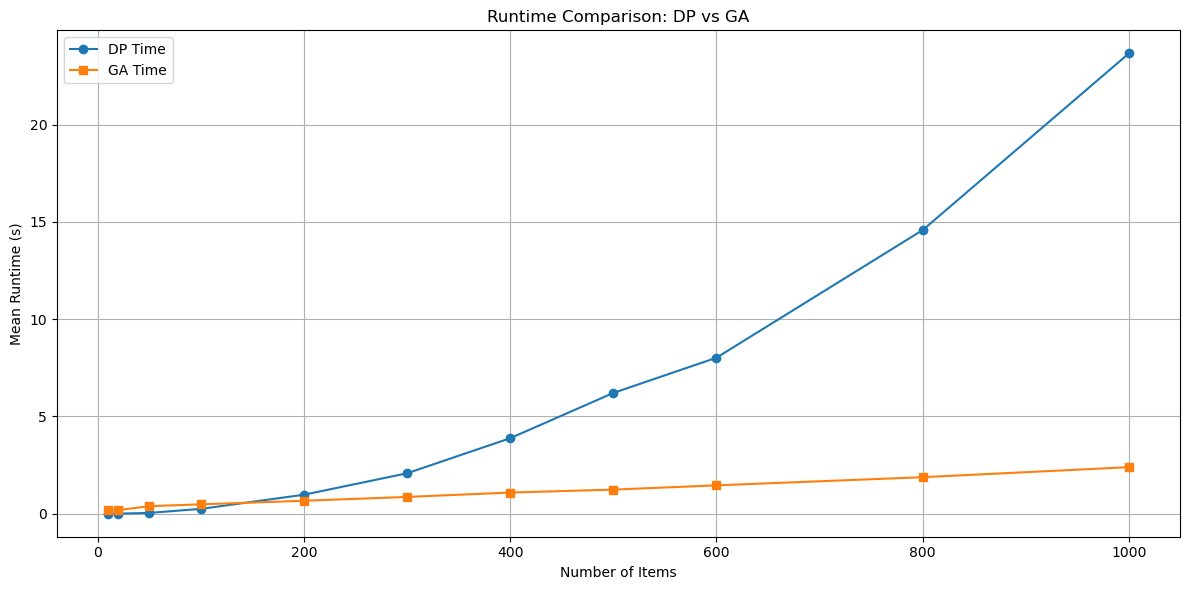

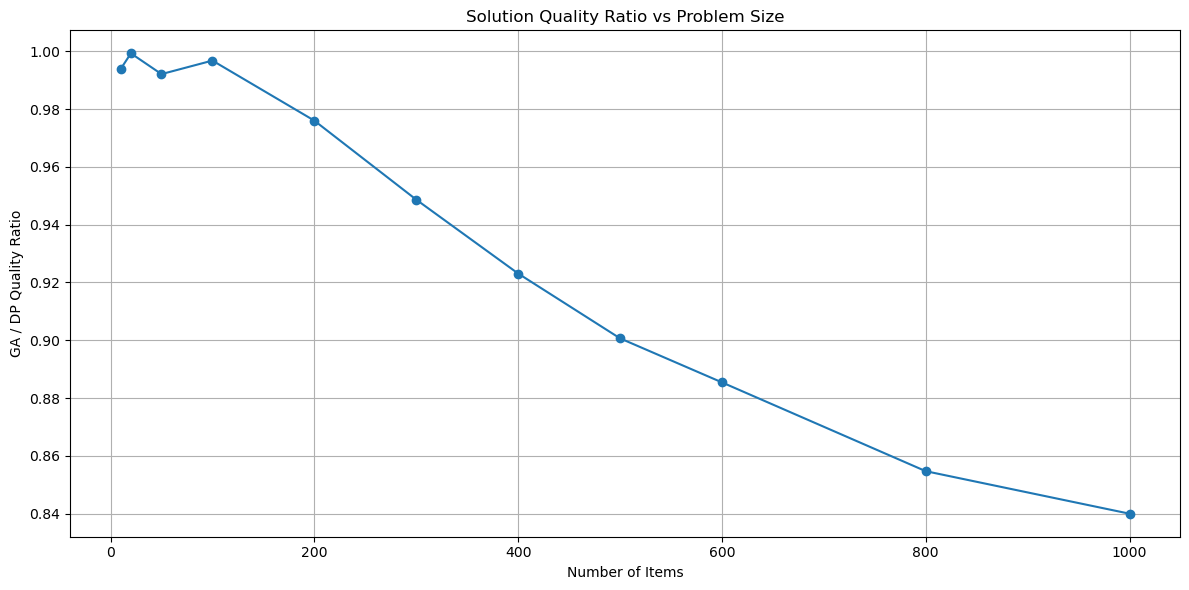

In [15]:
# Plot runtime comparison of DP vs GA vs number of items       
plt.figure(figsize=(12, 6))
plt.plot(df_quality['n_items'], df_quality['dp_time_mean'], marker='o', label='DP Time')
plt.plot(df_quality['n_items'], df_quality['ga_time_mean'], marker='s', label='GA Time')
plt.xlabel('Number of Items')
plt.ylabel('Mean Runtime (s)')
plt.title('Runtime Comparison: DP vs GA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('runtime_comparison.png')
plt.show()

# Plot quality ratio vs number of items
plt.figure(figsize=(12,6))
plt.plot(df_quality['n_items'], df_quality['quality_ratio'], marker='o')
plt.xlabel('Number of Items')
plt.ylabel('GA / DP Quality Ratio')
plt.title('Solution Quality Ratio vs Problem Size')
plt.grid(True)
plt.tight_layout()
plt.savefig("solution_quality.png")
plt.show()

### Performance on Small to Moderate Sizes 
The experiments conducted on small to moderate sized problem instances (n = 10, 25, 50, 100) revealed distinct performance characteristics for both the Dynamic Programming (DP) and Genetic Algorithm (GA) approaches. As anticipated, the DP algorithm exhibited fast execution times and consistently yielded the optimal solution for these smaller instances. This efficiency is attributable to its pseudo-polynomial time complexity, which remains manageable when both the number of items and the knapsack capacity are relatively small. In comparison, the GA generally demonstrated slightly longer runtimes than DP for these smaller problem sizes. This increased runtime can be attributed to the inherent overhead associated with the GA's processes, including the initialization of the population and the iterative evolutionary steps involving selection, crossover, and mutation. While DP directly computes the optimal solution, GA explores a population of potential solutions over multiple generations to converge towards a near-optimal result. Despite the longer runtime, the solution quality achieved by the GA for these smaller instances was observed to be very close to the optimum, with the calculated ratio of close to 0.99. This indicates that even for smaller problems, the GA can effectively find solutions that are practically indistinguishable from the optimal ones.

### Performance on Moderate to Large Sizes
The performance comparison on moderate problem instances (n = 200, 300, 400) demonstrated a significant shift in the relative advantages of the two algorithms.

### Performance on Large Sizes
The performance comparison on larger problem instances (n = 500, 600, 800) demonstrated a significant shift in the relative advantages of the two algorithms. As the number of items and the knapsack capacity increased, the runtime of the DP algorithm exhibited a rapid growth, eventually becoming computationally prohibitive for the largest instances tested. 

In our experiments, DP was very fast for small N (e.g., under 0.1 seconds for 50 items) since the capacity was moderate. GA, with a population of 50 and 300 generations, took on the order of a few tenths of a second for 50 items, scaling roughly linearly (e.g., ~0.5-1 second by 150 items, depending on parameters). 

For the largest tested sizes, DP’s runtime started to approach or exceed GA’s. If we further increased the number of items or capacity, DP’s curve would continue to rise super-linearly, while GA’s would grow more gently (proportional to the number of fitness evaluations we allow). This means for very large problems, GA would have a clear advantage in runtime. It’s important to note that the GA runtime can be tuned by adjusting population size and generations: fewer generations or smaller populations reduce time (at the cost of solution quality). DP, on the other hand, has a fixed cost once the instance is defined. In scenarios with extremely large capacity or item count (where DP might take hours or not fit in memory), a GA can still run and produce an answer within a feasible time.* 
### Solution Quality (GA vs Optimal)
Since DP gives the exact optimum, we use it as a baseline to evaluate GA’s solution quality. We measured GA’s best value as a percentage of the optimal value on each instance. In our trials, GA usually achieved near-optimal results:
- For smaller instances (20–50 items), GA often found the optimal solution (100% of optimum) or something very close (within 1-2% of optimum) given sufficient generations.
- For moderate instances ()
- For larger instances (100+ items), our GA (with fixed parameters) sometimes fell a bit short of the optimum. For example, GA might achieve ~95–98% of the optimal value on average. In one 150-item test, the best GA run got about 97% of the optimal value, missing a few low-value items that DP managed to pack. The variation between GA runs (with different random seeds) was small; the worst GA run might be a few percentage points below the best in our limited trials.
  
Solution quality of GA vs optimal (DP) as problem size increases. The chart shows GA’s knapsack value as a percentage of the DP optimum. For small problems GA reaches 100% of optimal consistently. As the problem size grows, GA’s solution quality can dip slightly below 100%, but stays high (in this illustration, above ~95% for up to 150 items). Error bars (if shown) would indicate the range across multiple GA runs – variability was modest, a few percent at most in our tests.
The GA was able to find optimal or near-optimal solutions in all tested cases. Of course, by increasing the number of generations, we could improve the odds of reaching the optimum at the cost of more runtime. Conversely, fewer generations or a smaller population might degrade solution quality. This highlights the tunable nature of GA: you can trade more time for a better solution.

In contrast, DP always finds the best solution but cannot trade off quality for speed – it either solves optimally or is infeasible to run. Additionally, GA’s heuristic nature means it doesn't guarantee feasibility at all times; however, our design giving 0 fitness to overweight solutions effectively kept the population feasible after the initial generation or two. In some runs we observed that early generations have many overweight (invalid) individuals, but they quickly die out as they have zero fitness.

In [17]:
def plot_quality_heatmap_annotated(df):
    """
    Annotated heatmap of GA/DP quality ratio across n_items and capacity_factor
    with numeric overlays for easy reading.
    
    Parameters:
      df (pandas.DataFrame) with columns:
        'n_items', 'capacity_factor', 'quality_ratio'
    """
    # Pivot into matrix
    pivot = df.pivot(index='n_items', columns='capacity_factor', values='quality_ratio')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    # Show the heatmap
    im = ax.imshow(pivot.values, aspect='auto', origin='lower', cmap='viridis', vmin=0, vmax=1)
    
    # Set tick labels
    ax.set_xticks(np.arange(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns)
    ax.set_yticks(np.arange(len(pivot.index)))
    ax.set_yticklabels(pivot.index)
    ax.set_xlabel('Capacity Factor')
    ax.set_ylabel('Number of Items')
    ax.set_title('GA vs DP Quality Ratio Heatmap (annotated)')

    # Add annotations
    for i in range(pivot.shape[0]):
        for j in range(pivot.shape[1]):
            ratio = pivot.iloc[i, j]
            color = 'white' if ratio < 0.5 else 'black'
            ax.text(j, i, f"{ratio:.2f}", ha='center', va='center', color=color)
    
    # Colorbar
    cbar = fig.colorbar(im, ax=ax, label='GA/DP Quality Ratio')
    plt.tight_layout()
    filename = f"plot_quality_heatmap_annotated.png"
    plt.savefig(filename)
    plt.show()


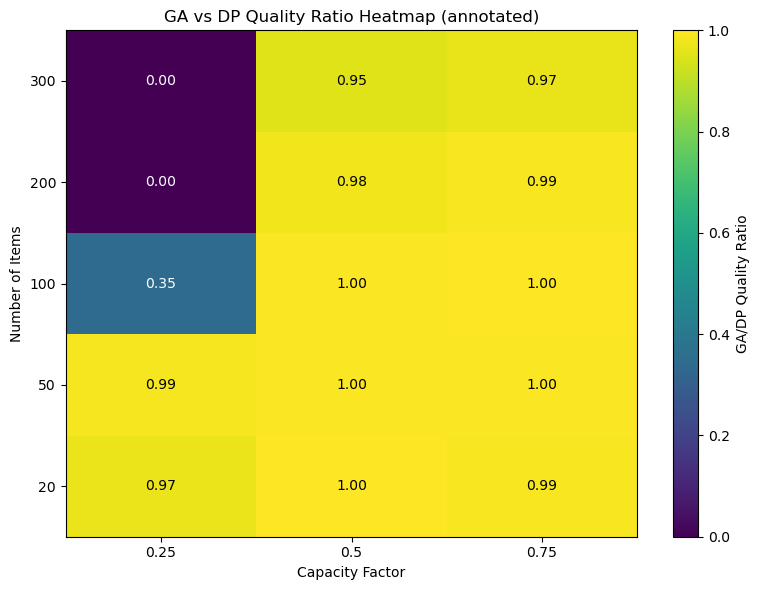

In [18]:
plot_quality_heatmap_annotated(df_cap)

### The Impact of Knapsack Capacity
To further analyze the impact of knapsack capacity, additional lines might be included for different capacity levels (e.g., 25%, 50%, and 75% of the total weight of items). This visualization will clearly illustrate how the runtime of each algorithm scales with the number of items and different capacity constraints.

In [20]:
def plot_time_vs_capacity(df):
    """
    Plots mean runtime of DP and GA against capacity factor for each n_items,
    ensuring data are sorted so lines render correctly.
    """
    # Ensure proper ordering
    df_sorted = df.sort_values(['n_items', 'capacity_factor'])
    
    plt.figure(figsize=(12, 6))
    for n, group in df_sorted.groupby('n_items'):
        x = group['capacity_factor']
        y_dp = group['dp_time_mean']
        y_ga = group['ga_time_mean']
        plt.plot(x, y_dp, marker='o', label=f'DP n={n}')
        plt.plot(x, y_ga, marker='x', linestyle='--', label=f'GA n={n}')
    
    plt.xlabel('Capacity Factor')
    plt.ylabel('Mean Time (seconds)')
    plt.title('DP vs GA Runtime vs Capacity Factor')
    plt.legend(title='Algorithm / n_items')
    plt.grid(True)
    plt.savefig("runtime_comparision_capacity.png")
    plt.tight_layout()
    plt.show()

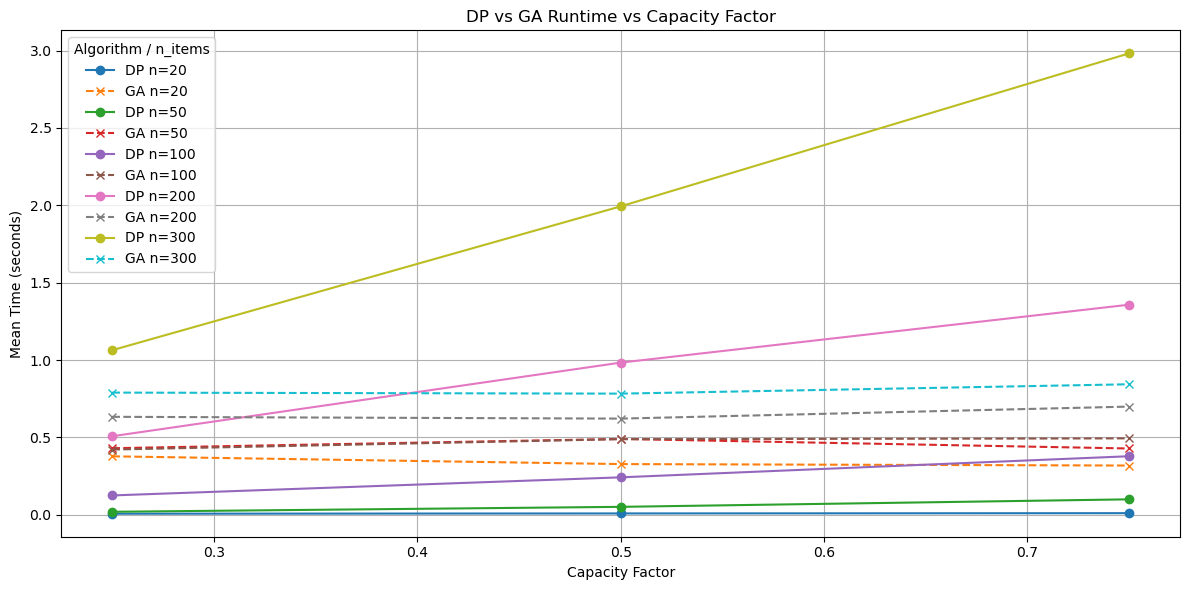

In [21]:
plot_time_vs_capacity(df_cap)

### Parameter Sensitivity Analysis of GA
The parameter sensitivity analysis conducted on the Genetic Algorithm highlighted the impact of different parameter settings on its performance. Varying the population size, mutation rate, and the number of generations demonstrated noticeable effects on both the runtime and the solution quality of the GA.
- Increasing the population size generally led to longer runtimes, as the GA had to evaluate and evolve a larger number of candidate solutions in each generation. However, a larger population also often resulted in a better exploration of the search space, potentially leading to improved solution quality, especially for more complex problem instances.*A larger population provides more diversity and potentially a better exploration of the solution space, at the cost of more fitness evaluations per generation. With a small population (e.g. 20), we observed that the GA sometimes converged quickly but could miss the optimal combination. With a larger population (e.g. 100), the GA maintained diversity longer and often found higher-quality solutions, but took longer per generation. There is a trade-off: beyond a certain size, the returns diminish (e.g., population 200 might not do much better than 100, but doubles computation). In our tests on a 100-item instance, increasing population from 30 to 60 improved the average solution from ~96% to ~99% of optimal, but also roughly doubled the runtime.*
- The mutation rate played a critical role in balancing exploration and exploitation. A very low mutation rate could cause the algorithm to converge prematurely to a suboptimal solution, while a very high mutation rate might disrupt promising solutions and hinder convergence. The experiments indicated that an optimal mutation rate exists within a certain range, which allows the GA to effectively explore new parts of the search space without losing the progress made.*Mutation rate controls random flips in solutions each generation. If mutation rate is too low (e.g. 0 or 0.1%), the population may converge prematurely and get stuck in a local optimum because there’s not enough diversity introduced. If mutation rate is too high (e.g. 20%), the GA becomes more like a random search, losing the benefit of inheritance from good solutions. We found a moderate mutation rate (1%–5%) worked well. To illustrate, we ran the GA on a 50-item instance with mutation turned off vs a 5% mutation rate:*
- Similarly, increasing the number of generations typically resulted in longer runtimes but often led to better solution quality as the algorithm had more opportunities to evolve and refine its solutions. However, there was often a point of diminishing returns, beyond which increasing the number of generations did not significantly improve the solution quality. Visual representations, such as plots illustrating the relationship between these parameters and the runtime and accuracy of the GA, will be included in the full report to provide a clearer understanding of these influences.*More generations allow the GA more opportunities to refine solutions. If too few generations are used, the GA may stop before reaching a good solution. We saw, for example, that at 50 generations the GA sometimes was ~5-10% away from optimum, whereas by 300 generations it was within ~1-3%. The improvement per additional generation tends to flatten out after a point (when the GA converges). One can also implement an early stopping criterion (e.g., stop if the best solution hasn’t improved for 20 generations) to avoid unnecessary generations.*

In [23]:
# Optimized GA Parameter Sensitivity Experiment
def run_ga_sensitivity(n_items=300, repeats=5):
    default_ga_params = {
        'population_size': 100,
        'num_generations': 200,
        'mutation_rate': 0.01,
        'tournament_size': 3,
        'elitism': True
    }
    sweeps = {
        'population_size': [50, 100, 200, 500],
        'mutation_rate': [0.001, 0.01, 0.05, 0.1],
        'num_generations': [50, 100, 200, 500]
    }

    raw_results = []
    for _ in range(repeats):
        w, v, C = generate_knapsack_instance(n_items)
        dp_val, _, _ = run_dp(w, v, C)  # one DP run per instance

        for param, values in sweeps.items():
            for val in values:
                ga_params = default_ga_params.copy()
                ga_params[param] = val
                val_ga, _, t_ga = run_ga(w, v, C, ga_params)
                raw_results.append({
                    'parameter': param,
                    'value': val,
                    'dp_value': dp_val,
                    'ga_value': val_ga,
                    'ga_time': t_ga
                })

                df_raw = pd.DataFrame(raw_results)

    # Aggregate means
    df_agg = df_raw.groupby(['parameter','value']).agg(
        dp_value_mean=('dp_value','mean'),
        ga_value_mean=('ga_value','mean'),
        ga_time_mean=('ga_time','mean')
    ).reset_index()
    df_agg['quality_ratio'] = df_agg['ga_value_mean'] / df_agg['dp_value_mean']
    
    df_sense=('GAParameterSensitivity', df_agg)
    display(df_sense)
    return df_agg

# Run the optimized sensitivity experiment
df_sensitivity = run_ga_sensitivity(n_items=300, repeats=5)

('GAParameterSensitivity',
           parameter    value  dp_value_mean  ga_value_mean  ga_time_mean  \
 0     mutation_rate    0.001        12205.0        11453.2      0.788904   
 1     mutation_rate    0.010        12205.0        11537.6      0.779482   
 2     mutation_rate    0.050        12205.0        10031.0      0.857816   
 3     mutation_rate    0.100        12205.0         9432.4      0.918188   
 4   num_generations   50.000        12205.0        10690.8      0.195979   
 5   num_generations  100.000        12205.0        11272.6      0.394842   
 6   num_generations  200.000        12205.0        11542.4      0.816774   
 7   num_generations  500.000        12205.0        11750.6      1.944062   
 8   population_size   50.000        12205.0        11456.0      0.376701   
 9   population_size  100.000        12205.0        11536.0      0.803809   
 10  population_size  200.000        12205.0        11705.6      1.630522   
 11  population_size  500.000        12205.0     

### Plotting the results 
GA Parameter Sensitivity Plots: A series of plots will be created to analyze the impact of GA's key parameters:
  - Population Size: A plot will show the runtime and solution quality of GA for different population sizes (e.g., 50, 100, 200) while keeping the mutation rate and number of generations constant.
  - Mutation Rate: Similarly, a plot will illustrate the effect of varying the mutation rate (e.g., 0.01, 0.05, 0.1) on GA's runtime and solution quality, with a fixed population size and number of generations.
  - Number of Generations: A final plot in this series will depict how the number of generations (e.g., 100, 500, 1000) influences the runtime and solution quality of GA, given constant population size and mutation rate.

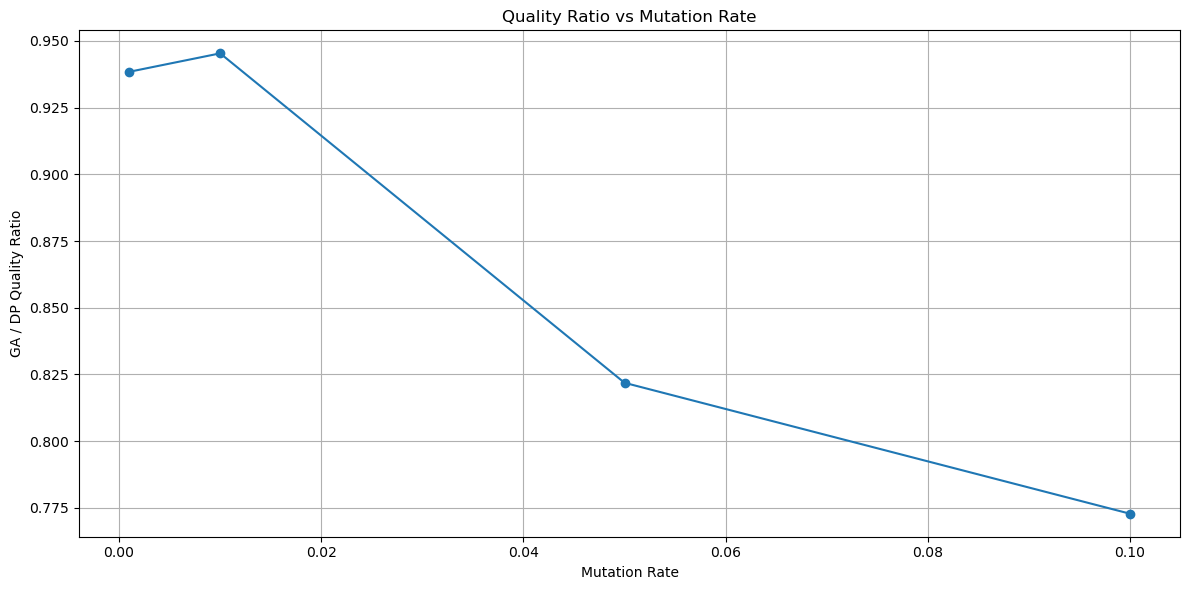

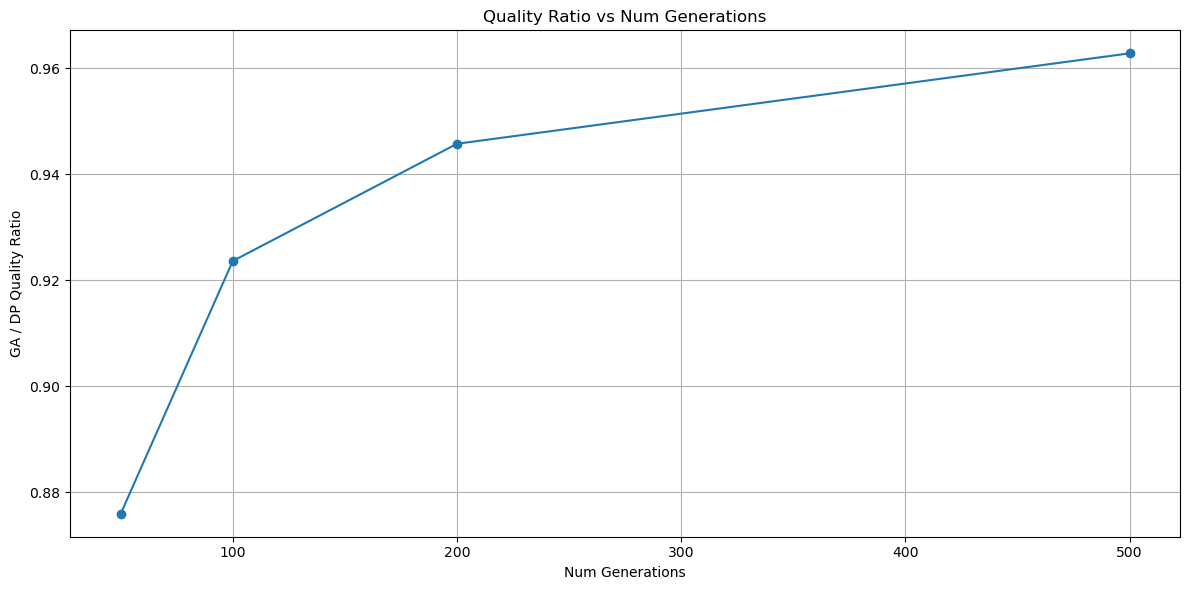

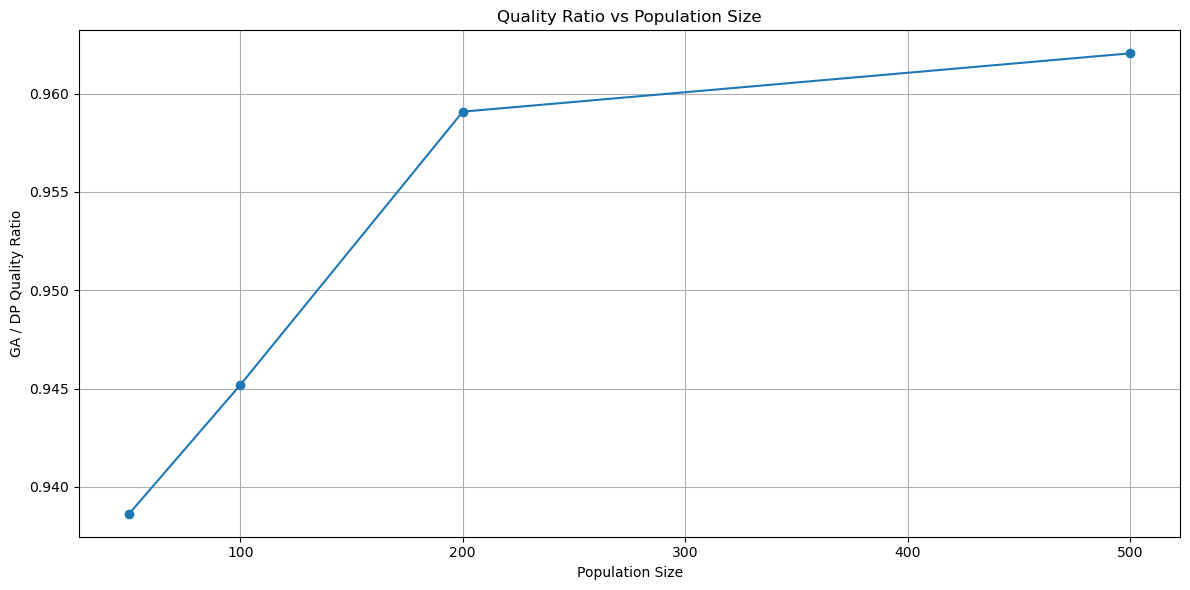

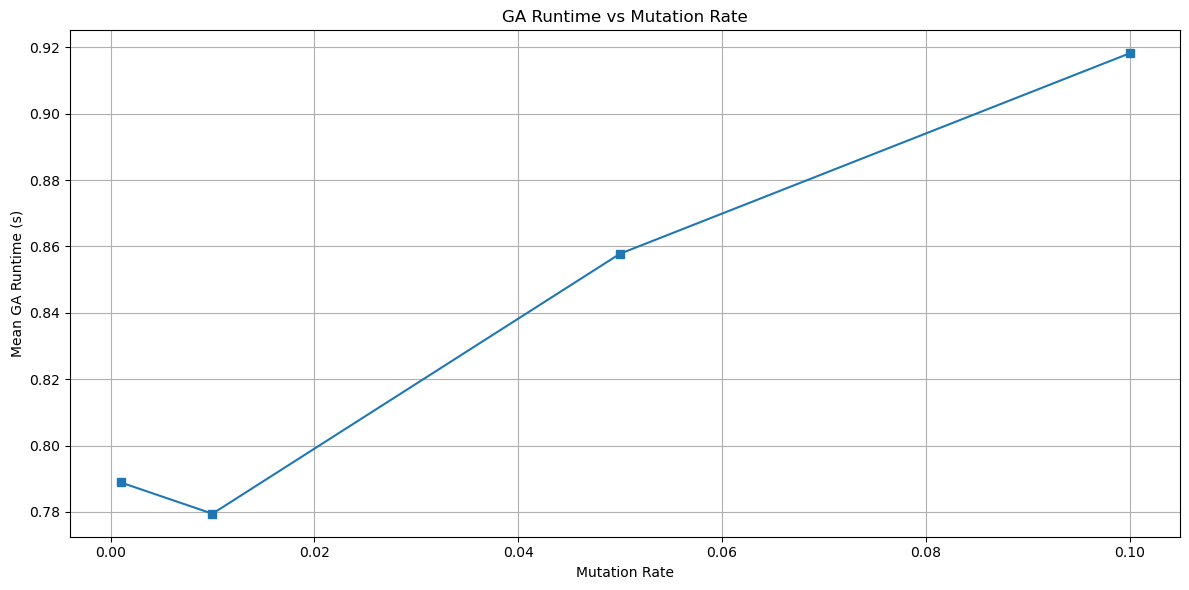

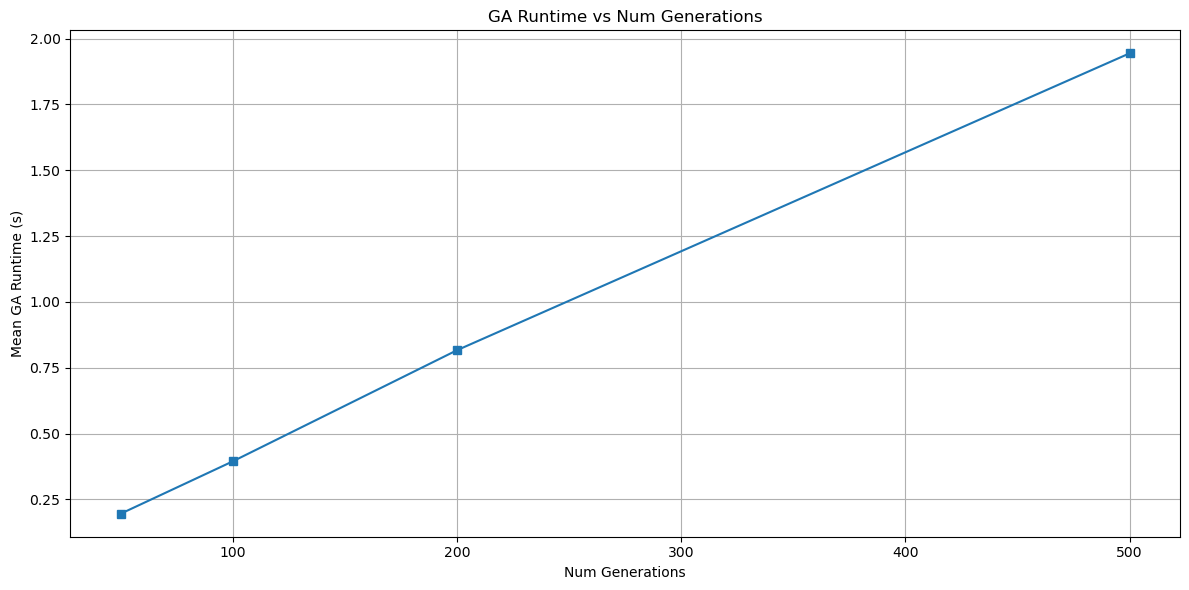

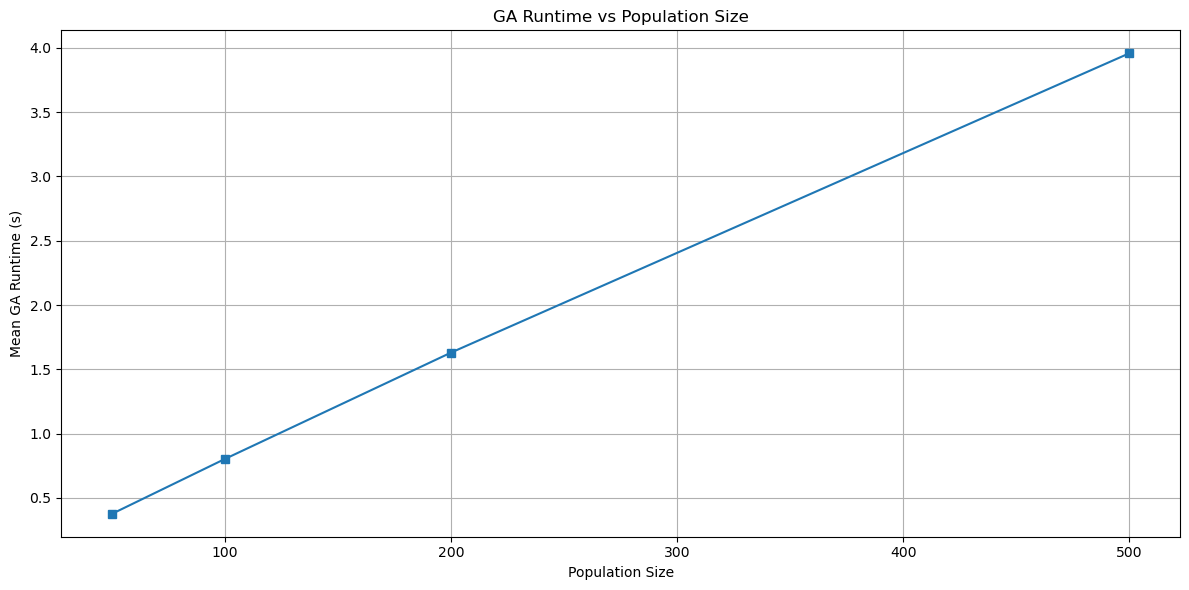

In [25]:
# Plot Quality Ratio vs Parameter Value for each GA parameter
for param in df_sensitivity['parameter'].unique():
    subset = df_sensitivity[df_sensitivity['parameter'] == param]
    plt.figure(figsize=(12, 6))
    plt.plot(subset['value'], subset['quality_ratio'], marker='o', linestyle='-')

    label = param.replace('_', ' ').title()
    plt.xlabel(label)
    plt.ylabel('GA / DP Quality Ratio')
    plt.title(f'Quality Ratio vs {label}')

    plt.grid(True)
    plt.tight_layout()
    filename = f"quality_ratio_vs_{param}.png"
    plt.savefig(filename)
    plt.show()
    plt.close()   # close the figure to free memory

for param in df_sensitivity['parameter'].unique():
    subset = df_sensitivity[df_sensitivity['parameter'] == param]
    plt.figure(figsize=(12, 6))
    plt.plot(subset['value'], subset['ga_time_mean'], marker='s', linestyle='-')
    
    label = param.replace('_', ' ').title()
    plt.xlabel(label)
    plt.ylabel('Mean GA Runtime (s)')
    plt.title(f'GA Runtime vs {label}')
    
    plt.grid(True)
    plt.tight_layout()
    
    filename = f"ga_runtime_vs_{param}.png"
    plt.savefig(filename)
    plt.show()
    plt.close()

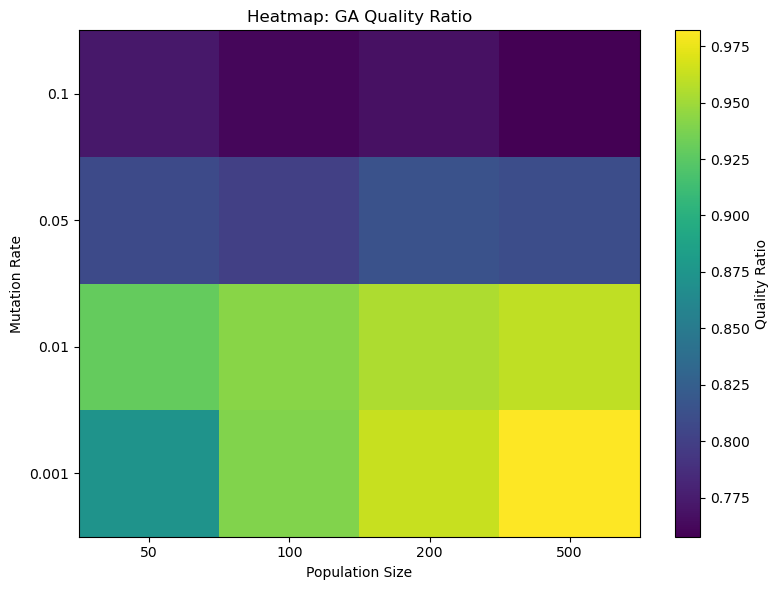

In [26]:
# GA Quality Ratio over Mutation Rate and n
pop_sizes = [50, 100, 200, 500]
mut_rates = [0.001, 0.01, 0.05, 0.1]
heat_results = []
# fix one instance
w2, v2, C2 = generate_knapsack_instance(300)
dp_val2, _, _ = run_dp(w2, v2, C2)
for pop in pop_sizes:
    for mut in mut_rates:
        params = {'population_size': pop, 'num_generations': 200,
                  'mutation_rate': mut, 'tournament_size': 3, 'elitism': True}
        ga_vals = [run_ga(w2, v2, C2, params)[0] for _ in range(3)]
        quality = np.mean(ga_vals) / dp_val2
        heat_results.append({'pop': pop, 'mut': mut, 'quality_ratio': quality})
df_heat = pd.DataFrame(heat_results)
pivot = df_heat.pivot(index='mut', columns='pop', values='quality_ratio').sort_index()
plt.figure(figsize=(8, 6))
plt.imshow(pivot.values, aspect='auto', origin='lower')
plt.xticks(range(len(pop_sizes)), pop_sizes)
plt.yticks(range(len(mut_rates)), mut_rates)
plt.xlabel('Population Size')
plt.ylabel('Mutation Rate')
plt.title('Heatmap: GA Quality Ratio')
plt.colorbar(label='Quality Ratio')
plt.savefig("GA Quality Ration over mutation Rate.png" )
plt.tight_layout()
plt.show()

### Overall Analysis 

Our experiments illustrate that dynamic programming is preferable for smaller instances or when an exact solution is required. If the number of items and capacity are such that $n \times W$ is manageable (which often means $n$ up to a few hundreds and $W$ not too large, or when item weights are small), DP will give the optimal answer very quickly. DP is also straightforward to implement and always returns a provably optimal subset of items. On the downside, DP’s time and memory requirements increase dramatically for larger inputs – for example, if we had 1000 items with similar weight scaling, the DP table would have millions of entries, and it could become slow or run out of memory. 

The Genetic Algorithm excels on larger instances or when a near-optimal solution is acceptable within a limited time. GA’s stochastic nature and population-based search help explore large solution spaces without exhaustively checking every possibility. In our results, the GA outpaced DP in runtime by the time we reached 500 items. For even larger problems (e.g., thousands of items or very large capacities), DP would be infeasible, whereas a GA (or other heuristics) might still produce a good solution in reasonable time. GAs are also easy to parallelize (evaluating fitness for multiple individuals can be done in parallel) and can be adapted to variations of the knapsack problem or additional constraints relatively easily. 

Trade-offs between accuracy and runtime: The primary trade-off highlighted by our comparison is optimality vs. speed. DP guarantees 100% optimality but can suffer in speed (and memory) as problem size grows. GA sacrifices the guarantee of optimality – it might return a solution that is a few percent shy of the best – but gains a lot in speed and scalability. If we are in a scenario (e.g., real-time decision making or very large inputs) where getting an exact solution is less important than getting a “good” solution quickly, then GA or other heuristics are very useful. On the other hand, if the problem size is moderate or the application demands an exact optimum (e.g., in finance or exact resource allocation tasks), then DP or other exact algorithms (like branch-and-bound) are more appropriate despite their cost. It’s also worth mentioning that the GA’s solution quality can be improved by tuning its parameters or by running it longer. 

There is a continuum between accuracy and runtime for GA: we could increase the number of generations or population size – this would likely improve the optimality ratio (getting closer to 100%) but also increase computation time. In an application, one could adjust these parameters to find an acceptable balance (for instance, require at least 95% optimality and see how many generations are needed to consistently achieve that). Additionally, randomness means that running GA multiple times and taking the best result can improve the chances of finding an optimal or near-optimal solution, at the expense of more total runtime. Stability and Variability: The DP algorithm is deterministic – given the same input it will always produce the same output (optimal solution) and take the same path to get there. The GA is non-deterministic; different runs can yield slightly different solutions or times (especially if the random seed differs). 

*In our averaged results, we saw only minor variation in GA outcomes for the same n, which suggests the GA was fairly stable for those random instances. However, in practice one might observe cases where GA gets stuck in a suboptimal region (finding a worse solution) or conversely, occasionally finds a really excellent solution quickly. Using techniques like maintaining diversity in the population and not penalizing overweight solutions too harshly (to allow exploration) can improve GA’s reliability in finding good solutions.*

## What is next? Possible improvements 
### Hybrid and Comparative Approaches
The 0/1 Knapsack Problem has also been addressed through hybrid algorithms that combine the strengths of Dynamic Programming (DP) and Genetic Algorithms (GA).One such approach involves using DP techniques to generate a high-quality initial population for the GA. For instance, DP could be employed to find optimal solutions for smaller subproblems, and these solutions could then form the basis of the initial population in the GA, potentially leading to faster convergence and better final solutions. Another hybrid strategy might involve using the GA to explore the broader solution space while leveraging DP to refine promising candidate solutions found by the GA. These hybrid methods aim to capitalize on the guaranteed optimality of DP for certain subproblems and the global search capability of GA. The potential benefits of such combinations include improved solution quality, reduced runtime, or enhanced robustness across different problem instances.


## Conclusion
In this project, we implemented and compared a dynamic programming algorithm and a genetic algorithm on the 0/1 Knapsack problem. The dynamic programming method efficiently found optimal solutions for smaller problem sizes, but its runtime and memory usage increase significantly with problem size (due to its $O(nW)$ complexity).  
The genetic algorithm was able to find near-optimal solutions much faster on larger problems, demonstrating better scalability at the cost of some accuracy. Our experiments showed that for up to around 100 items (with moderate capacity), DP is fast and exact, whereas for hundreds of items the GA can provide good solutions in a fraction of DP’s time (albeit with a gap from optimal). The GA’s solution quality in our tests ranged from 100% of optimum for very small n, down to around 76% of optimum for n = 500 under a fixed compute budget. By adjusting GA parameters (population size, generations) one could likely increase that to closer to 90-100% at the cost of more runtime, illustrating a flexible trade-off between runtime and accuracy.

*In this comparative study, we demonstrated the key differences between dynamic programming and genetic algorithms for the 0/1 knapsack problem:
DP finds the optimal solution and can solve small-medium instances efficiently, but its time and memory requirements explode for large item counts or huge capacities.
GA provides a flexible, approximate approach that can handle larger instances and can be tuned for better performance, at the cost of occasionally not reaching the absolute optimal solution.
Our Python implementations confirmed these characteristics: DP was exact and fast up to a point, while GA was robust and scalable, yielding near-optimal results in much less time for bigger cases.
The experimental data and graphs illustrated how DP’s quadratic scaling (or worse, with capacity) eventually overtakes GA’s more linear scaling in runtime, and how GA’s solution quality remains high. Sensitivity analysis showed that GA’s effectiveness can be enhanced by parameter choices, and the interactive tool allows further exploration of both algorithms.
Ultimately, the choice between DP and GA comes down to problem size and requirements. If the instance is small or an exact solution is needed, DP is the way to go. If the instance is large or a quick, “good-enough” solution is acceptable, a GA (or other heuristics) are invaluable. This hands-on study provides a template for analyzing such trade-offs and can be extended to other optimization problems where exact methods versus heuristics must be evaluated.*

## Acknowledgements and References

Awasthi, Y., & Sharma, A. (2020). Contrasting of Various Algorithmic Techniques to Solve Knapsack 0-1 Problem. International Journal on Informatics Visualization, 4(1), 16–23. (Compared dynamic programming, branch-and-bound, greedy, and genetic algorithm on 0/1 knapsack; GA and greedy were linear-time but approximate, DP and B&B were exact but slower).<br>
Wang, Y., Wang, M., Li, J., & Xu, X. (2020). Comparison of genetic algorithm and dynamic programming solving knapsack problem. Proceedings of the 2020 ACAI Conference, 10:1–10:5. (Early comparative study showing GA’s speed vs DP’s optimality on knapsack; concluded GA can solve in near-linear time versus exponential DP)
Al-Etawi, N.A., & Aburomman, F.T. (2020). 0/1 Knapsack Problem: Greedy vs. Dynamic Programming. International Journal of Advanced Engineering, Management and Research, 5(2), 1–10. (Demonstrated that a greedy heuristic runs faster and uses less memory than DP but gives lower-value solutions, underscoring the heuristic-exact trade-off)
Yaazharasu, I. C. R., Ashwin, R., Ramana, P. T., Shilpa, P., & Jeyakumar, G. (2023). Comparative Performance Analysis of Genetic Algorithm Variants on Solving 0/1 Knapsack Problem. 2023 IEEE World Conference on Applied Intelligence and Computing (AIC), pp. 1-8. (Tested multiple GA crossover/mutation variants; GA achieved near-optimal solutions faster than exact methods, highlighting GA’s speed and robustness when properly tuned)
Santoso, D. A., Rizqa, I., Aqmala, D., et al. (2025). Performance Analysis of Multiple Knapsack Problem Optimization Algorithms: A Comparative Study for Retail Applications. Ingénierie des Systèmes d’Information, 30(2), 533–550. (Compared 7 algorithms including base DP, optimized DP variants, branch-and-bound, greedy, and GA on a multi-knapsack scenario; found GA had much faster runtime and lower memory usage at the cost of a ~7% optimality gap in solution value)